In [36]:
# Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
from tqdm import tqdm
from statsmodels.tsa.stattools import adfuller
import warnings

In [37]:
# Settings
style.use('fivethirtyeight')
warnings.filterwarnings('ignore')
%matplotlib inline

In [38]:
# Function to load data
def load_data(file_path, parse_dates=False):
    return pd.read_csv(file_path, compression='zip', parse_dates=parse_dates)


In [39]:
# Specify file paths
train1_path = r"C:\Users\Admin\Downloads\train_1.csv.zip"
train2_path = r"C:\Users\Admin\Downloads\train_2.csv.zip"

# Load the datasets using the defined function
train1 = load_data(train1_path, parse_dates=True)
train2 = load_data(train2_path, parse_dates=True)


In [40]:
# Extracting language from the 'Page' column by splitting the string appropriately
train1['Language'] = train1['Page'].apply(lambda x: x.split('.')[-3][-2:])



In [41]:
# Function to perform stationarity tests and plot results
def stationarity_test(timeseries, rolling_window=12):
    # Calculate rolling statistics
    rolling_mean = timeseries.rolling(window=rolling_window).mean()
    rolling_std = timeseries.rolling(window=rolling_window).std()

    # Plotting the statistics
    plt.figure(figsize=(14, 5))
    plt.plot(timeseries, color='blue', label='Original')
    plt.plot(rolling_mean, color='red', label='Rolling Mean')
    plt.plot(rolling_std, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Dickey-Fuller test
    result = adfuller(timeseries.dropna(), autolag='AIC')
    print('Results of Dickey-Fuller Test:')
    df_output = pd.Series(result[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in result[4].items():
        df_output[f'Critical Value ({key})'] = value
    print(df_output)


  0%|                                                                                            | 0/9 [00:00<?, ?it/s]

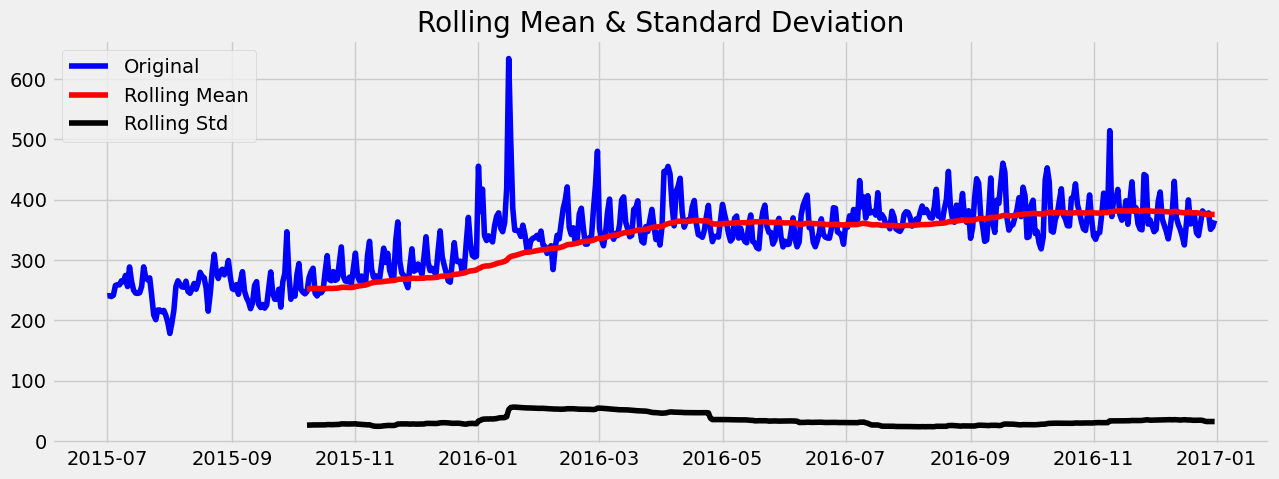

 11%|█████████▎                                                                          | 1/9 [00:02<00:17,  2.20s/it]

Results of Dickey-Fuller Test:
Test Statistic                  -1.668433
p-value                          0.447446
#Lags Used                      19.000000
Number of Observations Used    530.000000
Critical Value (1%)             -3.442749
Critical Value (5%)             -2.867009
Critical Value (10%)            -2.569683
dtype: float64


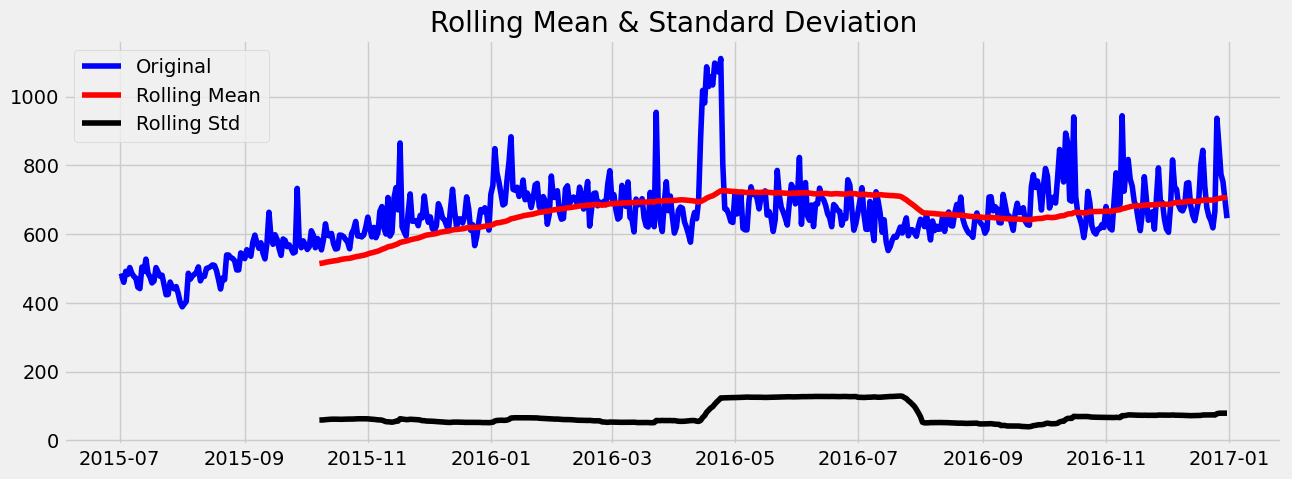

 22%|██████████████████▋                                                                 | 2/9 [00:04<00:14,  2.06s/it]

Results of Dickey-Fuller Test:
Test Statistic                  -2.849875
p-value                          0.051495
#Lags Used                      13.000000
Number of Observations Used    536.000000
Critical Value (1%)             -3.442609
Critical Value (5%)             -2.866947
Critical Value (10%)            -2.569650
dtype: float64


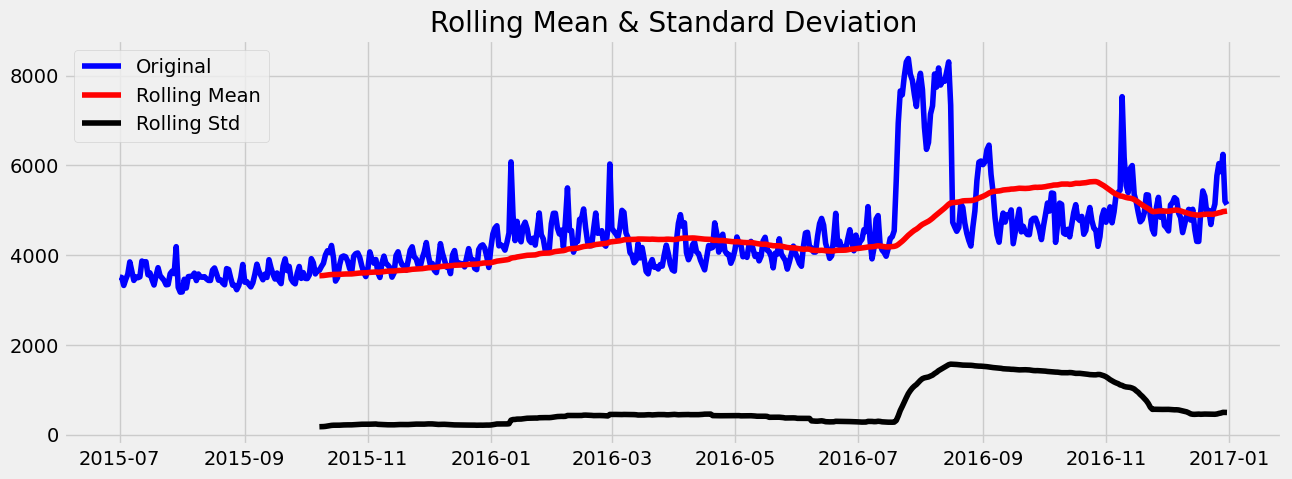

 33%|████████████████████████████                                                        | 3/9 [00:06<00:13,  2.29s/it]

Results of Dickey-Fuller Test:
Test Statistic                  -2.247284
p-value                          0.189534
#Lags Used                      14.000000
Number of Observations Used    535.000000
Critical Value (1%)             -3.442632
Critical Value (5%)             -2.866957
Critical Value (10%)            -2.569655
dtype: float64


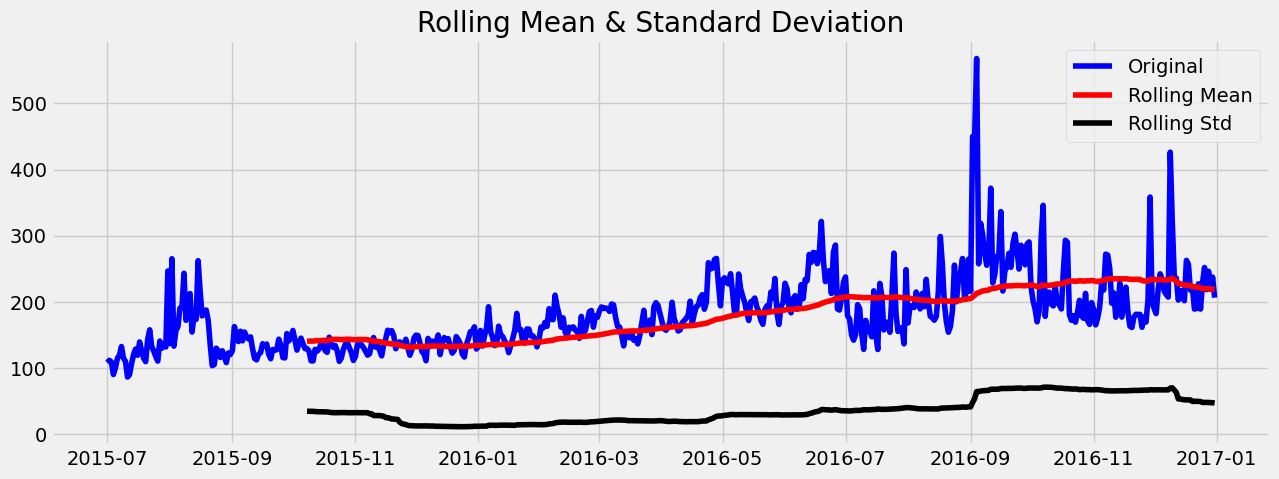

 44%|█████████████████████████████████████▎                                              | 4/9 [00:08<00:09,  1.94s/it]

Results of Dickey-Fuller Test:
Test Statistic                  -2.840219
p-value                          0.052754
#Lags Used                       6.000000
Number of Observations Used    543.000000
Critical Value (1%)             -3.442450
Critical Value (5%)             -2.866877
Critical Value (10%)            -2.569613
dtype: float64


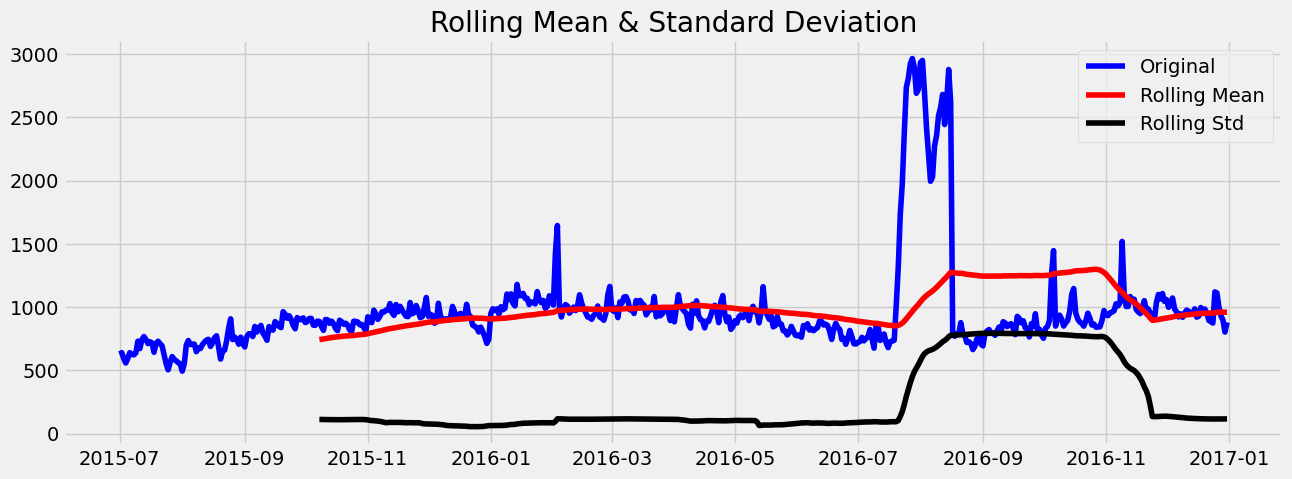

 56%|██████████████████████████████████████████████▋                                     | 5/9 [00:09<00:07,  1.87s/it]

Results of Dickey-Fuller Test:
Test Statistic                  -3.924031
p-value                          0.001865
#Lags Used                       3.000000
Number of Observations Used    546.000000
Critical Value (1%)             -3.442384
Critical Value (5%)             -2.866848
Critical Value (10%)            -2.569597
dtype: float64


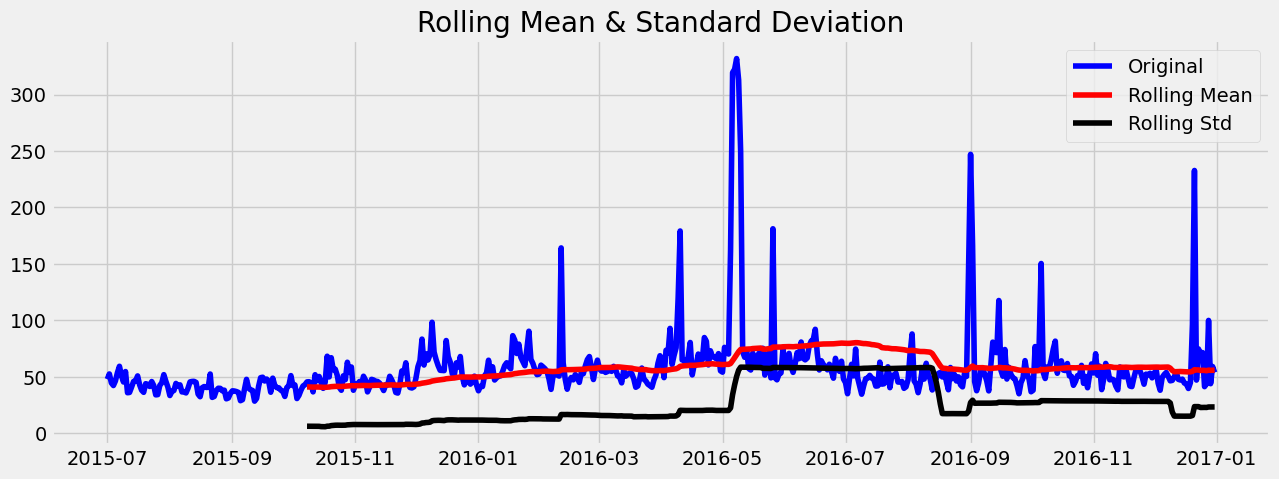

 67%|████████████████████████████████████████████████████████                            | 6/9 [00:12<00:06,  2.13s/it]

Results of Dickey-Fuller Test:
Test Statistic                -6.338871e+00
p-value                        2.786556e-08
#Lags Used                     7.000000e+00
Number of Observations Used    5.420000e+02
Critical Value (1%)           -3.442473e+00
Critical Value (5%)           -2.866887e+00
Critical Value (10%)          -2.569618e+00
dtype: float64


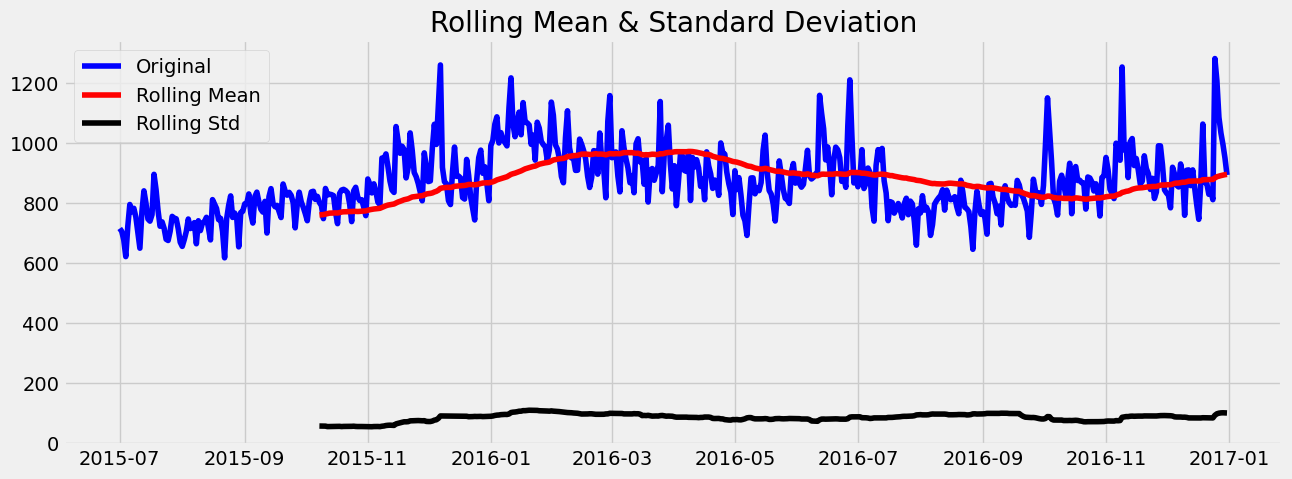

 78%|█████████████████████████████████████████████████████████████████▎                  | 7/9 [00:14<00:04,  2.12s/it]

Results of Dickey-Fuller Test:
Test Statistic                  -2.402707
p-value                          0.140974
#Lags Used                      16.000000
Number of Observations Used    533.000000
Critical Value (1%)             -3.442678
Critical Value (5%)             -2.866978
Critical Value (10%)            -2.569666
dtype: float64


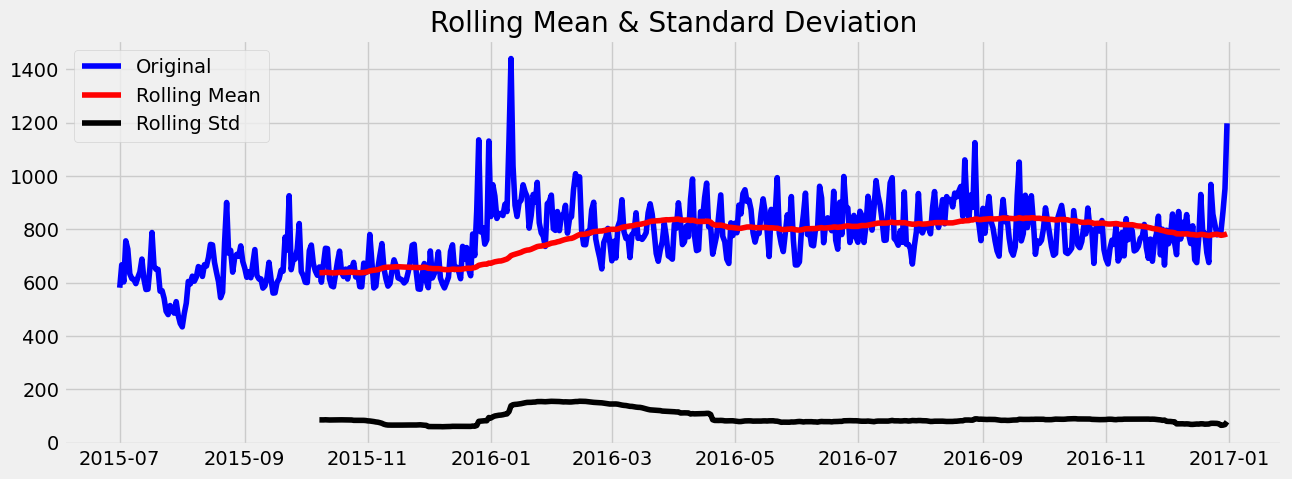

 89%|██████████████████████████████████████████████████████████████████████████▋         | 8/9 [00:16<00:02,  2.19s/it]

Results of Dickey-Fuller Test:
Test Statistic                  -2.555394
p-value                          0.102571
#Lags Used                       8.000000
Number of Observations Used    541.000000
Critical Value (1%)             -3.442495
Critical Value (5%)             -2.866897
Critical Value (10%)            -2.569623
dtype: float64


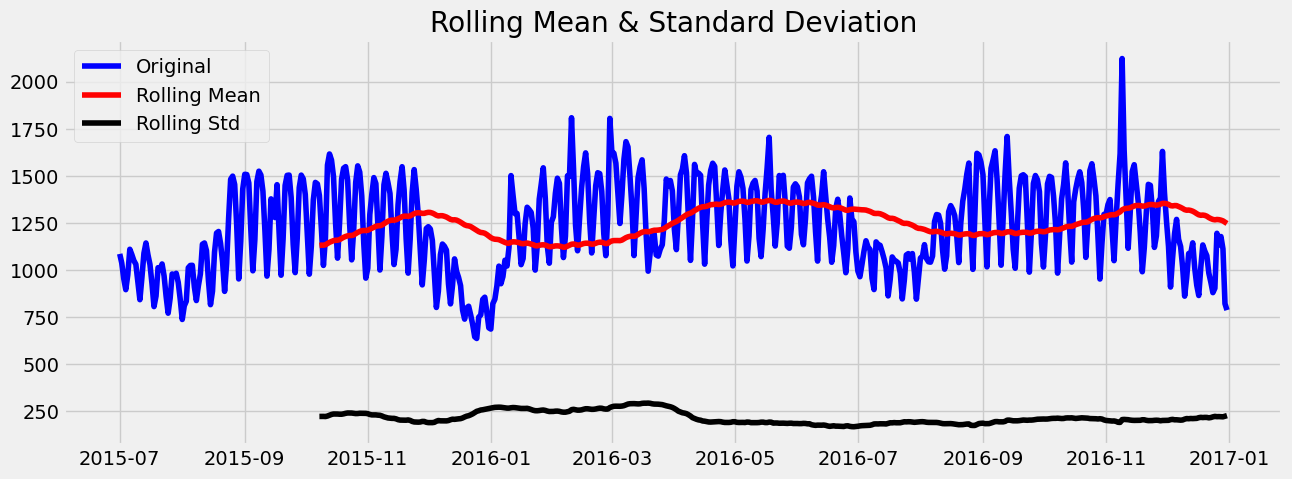

100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:18<00:00,  2.07s/it]

Results of Dickey-Fuller Test:
Test Statistic                  -3.014209
p-value                          0.033589
#Lags Used                      15.000000
Number of Observations Used    534.000000
Critical Value (1%)             -3.442655
Critical Value (5%)             -2.866968
Critical Value (10%)            -2.569661
dtype: float64


In [42]:
# Apply stationarity test to data grouped by language
for lang in tqdm(train1['Language'].unique()):
    data = train1[train1['Language'] == lang]
    data.drop(['Page', 'Language'], axis=1, inplace=True)
    pivot = data.melt(var_name='Date', value_name='Visits')
    pivot['Date'] = pd.to_datetime(pivot['Date'])
    pivot.fillna(0, inplace=True)
    
    # Group by date and apply the stationarity test
    grouped_data = pivot.groupby('Date')['Visits'].mean()
    stationarity_test(grouped_data, rolling_window=100)


### Prepare Data for Auto Correlation and Partial Correlation Analysis

In [43]:
# Drop only 'Language' column, retain 'Page' and all date columns
pivot = train1.drop(['Language'], axis=1)

# Melt the dataframe to long format with 'Page' as an id_var to keep track of each page's data across dates
train_pivot = pivot.melt(id_vars='Page', var_name='Date', value_name='Visits')
train_pivot.fillna(0, inplace=True)
train_pivot['Visits'] = train_pivot['Visits'].astype(float)

# Check the first few rows to ensure the operation was successful
train_pivot.head()



,Page,Date,Visits
0,2NE1_zh.wikipedia.org_all-access_spider,2015-07-01,18.0
1,2PM_zh.wikipedia.org_all-access_spider,2015-07-01,11.0
2,3C_zh.wikipedia.org_all-access_spider,2015-07-01,1.0
3,4minute_zh.wikipedia.org_all-access_spider,2015-07-01,35.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,2015-07-01,0.0


#### Auto Correlation Function (ACF) Plot



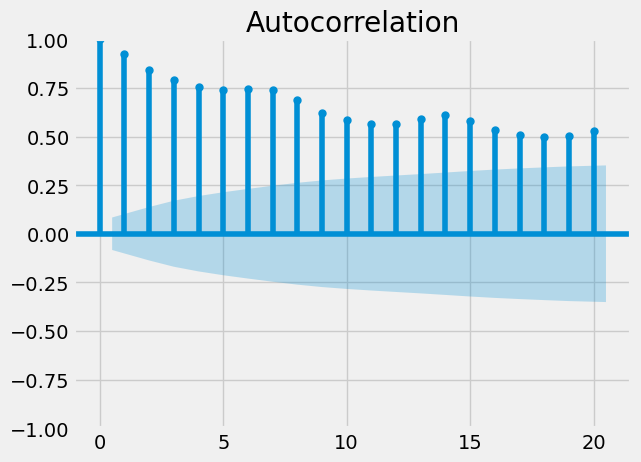

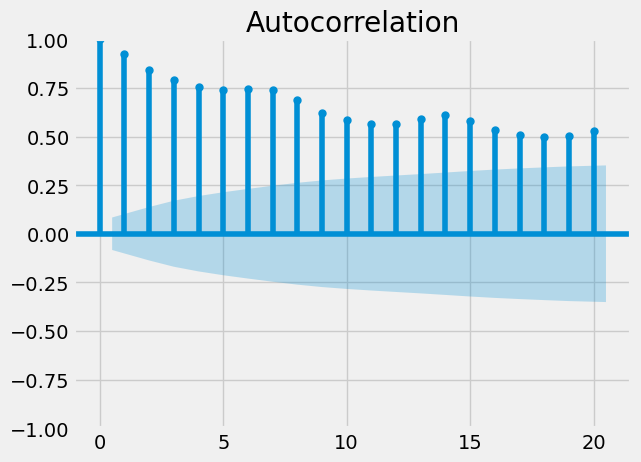

In [44]:
# Group by Date and calculate mean visits per day
acf = train_pivot[['Date', 'Visits']].groupby(['Date'])['Visits'].mean()

# Plot the auto correlation function for the visits
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(acf, lags=20)


### SMAPE Metric Function

In [45]:
# Define SMAPE function to calculate forecasting accuracy
def smape(actual, forecast):
    result = 1 / len(actual) * np.sum(2 * np.abs(forecast - actual) / (np.abs(actual) + np.abs(forecast)) * 100)
    return result


In [46]:
# Define a function to plot actual vs predicted values
def plot_predictions(actual, predicted, figsize, title):
    plt.figure(figsize=figsize)
    actual = plt.plot(actual, color='blue', label='Actual')
    predicted = plt.plot(predicted, color='red', label='Predicted')
    plt.title(title)
    plt.legend()
    plt.show()


In [47]:
# List of columns you want to drop
columns_to_drop = ['Page', 'Language']  

# Check and drop only if the column exists in DataFrame
columns_to_drop = [col for col in columns_to_drop if col in train1.columns]

# Drop the columns safely
data = train1.drop(columns_to_drop, axis=1)

# Fill missing values with zero
data.fillna(0, inplace=True)

# Output to verify the result
print(data.head())



   2015-07-01  2015-07-02  2015-07-03  2015-07-04  2015-07-05  2015-07-06  \
0        18.0        11.0         5.0        13.0        14.0         9.0   
1        11.0        14.0        15.0        18.0        11.0        13.0   
2         1.0         0.0         1.0         1.0         0.0         4.0   
3        35.0        13.0        10.0        94.0         4.0        26.0   
4         0.0         0.0         0.0         0.0         0.0         0.0   

   2015-07-07  2015-07-08  2015-07-09  2015-07-10  ...  2016-12-22  \
0         9.0        22.0        26.0        24.0  ...        32.0   
1        22.0        11.0        10.0         4.0  ...        17.0   
2         0.0         3.0         4.0         4.0  ...         3.0   
3        14.0         9.0        11.0        16.0  ...        32.0   
4         0.0         0.0         0.0         0.0  ...        48.0   

   2016-12-23  2016-12-24  2016-12-25  2016-12-26  2016-12-27  2016-12-28  \
0        63.0        15.0        26.0  

### AutoRegression Model

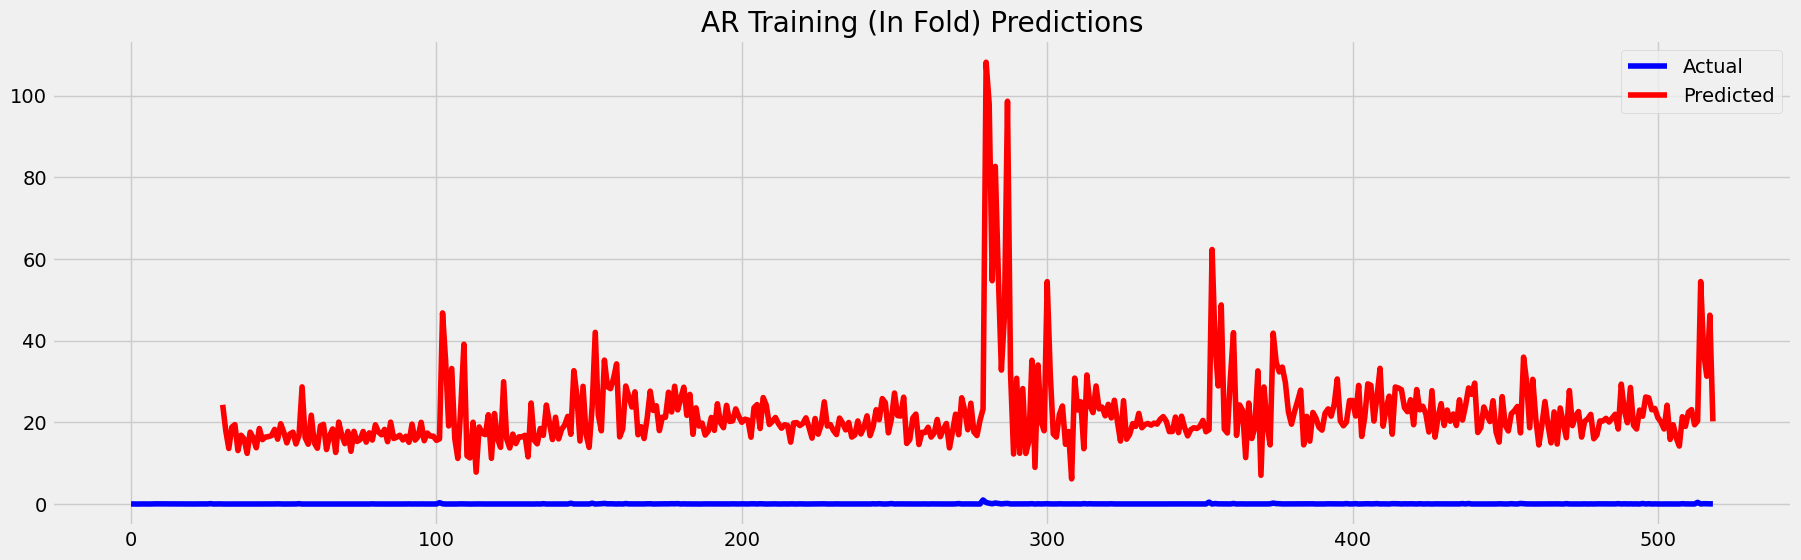

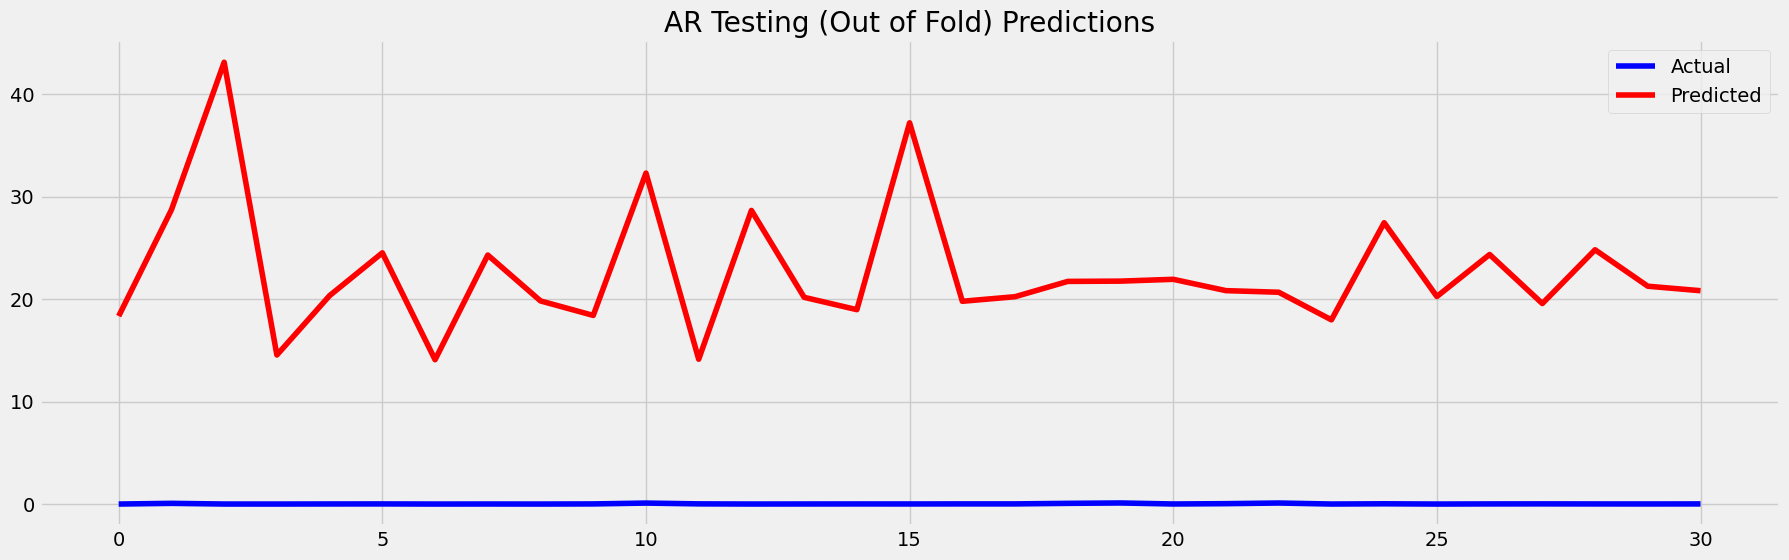

Train Error: nan% | Test Error: 199.19799168002112%


In [48]:
from statsmodels.tsa.ar_model import AutoReg
from sklearn.preprocessing import MinMaxScaler

def AutoRegression(data, lags, test_days, visualize_prediction=False):
    # Normalize the data
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(data.reshape(-1, 1))   

    # Split the data into training and testing sets
    train = scaled_data[:-test_days]   
    test = scaled_data[-test_days:]    

    # Fit the Auto Regression Model
    model = AutoReg(train, lags=lags).fit()

    # Predict on training and testing data
    train_pred = model.predict(start=0, end=len(train) - 1)   
    test_pred = model.predict(start=len(train), end=len(train) + len(test) - 1)   

    # Inverse transformation for original scale
    train_pred = scaler.inverse_transform(train_pred.reshape(-1, 1))
    test_pred = scaler.inverse_transform(test_pred.reshape(-1, 1))

    # Optionally visualize predictions
    if visualize_prediction:
        plot_predictions(train, train_pred, figsize=(20, 6), title='AR Training (In Fold) Predictions')
        plot_predictions(test, test_pred, figsize=(20, 6), title='AR Testing (Out of Fold) Predictions')

    # Calculate error metrics
    train_error = smape(train, train_pred)
    test_error = smape(test, test_pred)

    print(f'Train Error: {train_error}% | Test Error: {test_error}%')

    return model

# Example of applying the function to the first row of data
train = data.iloc[0, :].values
model = AutoRegression(train, lags=30, test_days=31, visualize_prediction=True)


#### ARIMA

In [49]:
from statsmodels.tsa.arima.model import ARIMA
def Arima(data, p, d, q, test_days, visualize_predictions=False):

    train_date = data[:-31]
    test_date = data[-31:]

    data = data.astype('float')
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(data.values.reshape(-1, 1))

    #scaled_data.index = pd.to_datetime(data.index)
    train = scaled_data[:-31]
    test = scaled_data[-31:]

    #print(train), print(type(train)), print(train.shape), print(len(train))
    train = pd.Series(train.reshape(len(train)), index=pd.to_datetime(train_date.index))
    test = pd.Series(test.reshape(len(test)), index=pd.to_datetime(test_date.index))

    arima = ARIMA(train, order=[p, d, q])
    model = arima.fit()

    # Predict
    ## Training predictions
    train_start = 0
    train_end = len(train)
    train_pred = model.predict(start=train_start, end=train_end, typ='levels')

    ## Testing predictions
    test_start = len(train)
    test_end = len(train) + len(test) - 1
    test_pred = model.predict(start=test_start, end=test_end, typ='levels')

    # Inverse transform
    train_inverse = scaler.inverse_transform(np.array(train_pred).reshape(-1, 1))
    test_inverse = scaler.inverse_transform(np.array(test_pred).reshape(-1, 1))

    #print(test_pred)

    if visualize_predictions:
        plot_predictions(train, train_pred, (20, 5), 'ARIMA Training Predictions')
        plot_predictions(test, test_pred, (20, 5), 'ARIMA Testing Predictions')
    
    train_error = smape(train, train_pred)
    test_error = smape(test, test_pred)
    
    print(f'Train Error: {train_error} | Test Error: {test_error}')
    
    return model

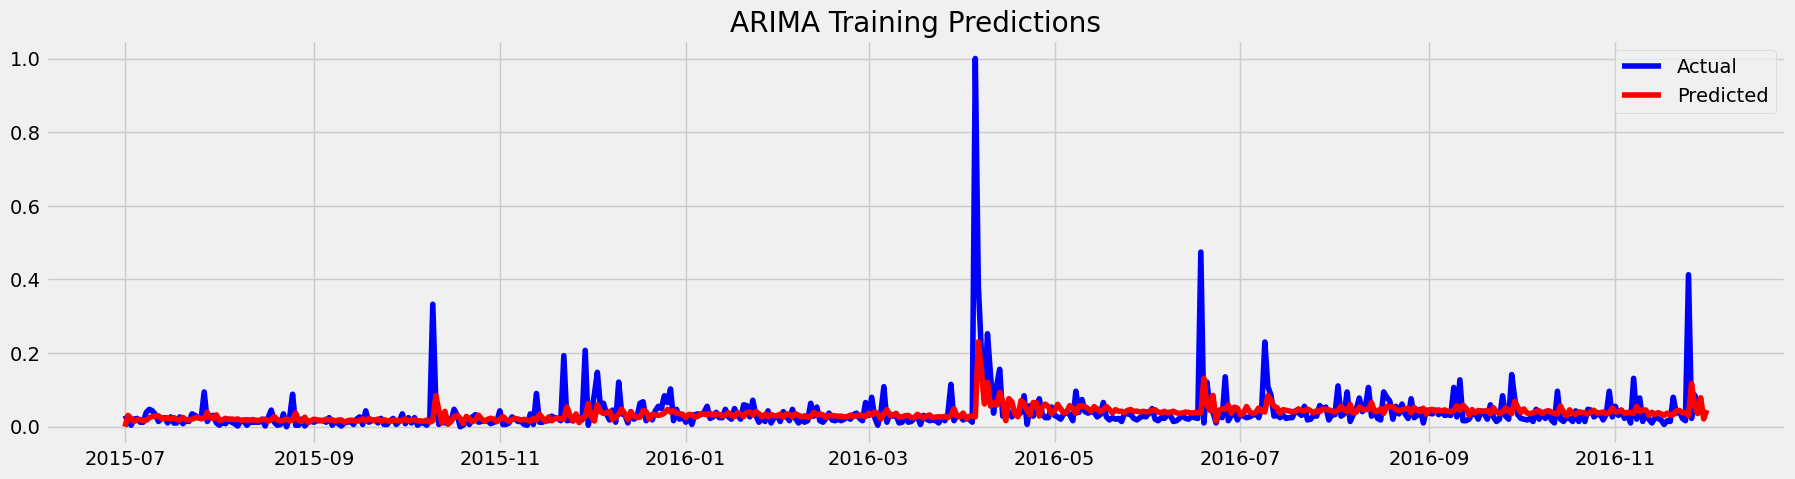

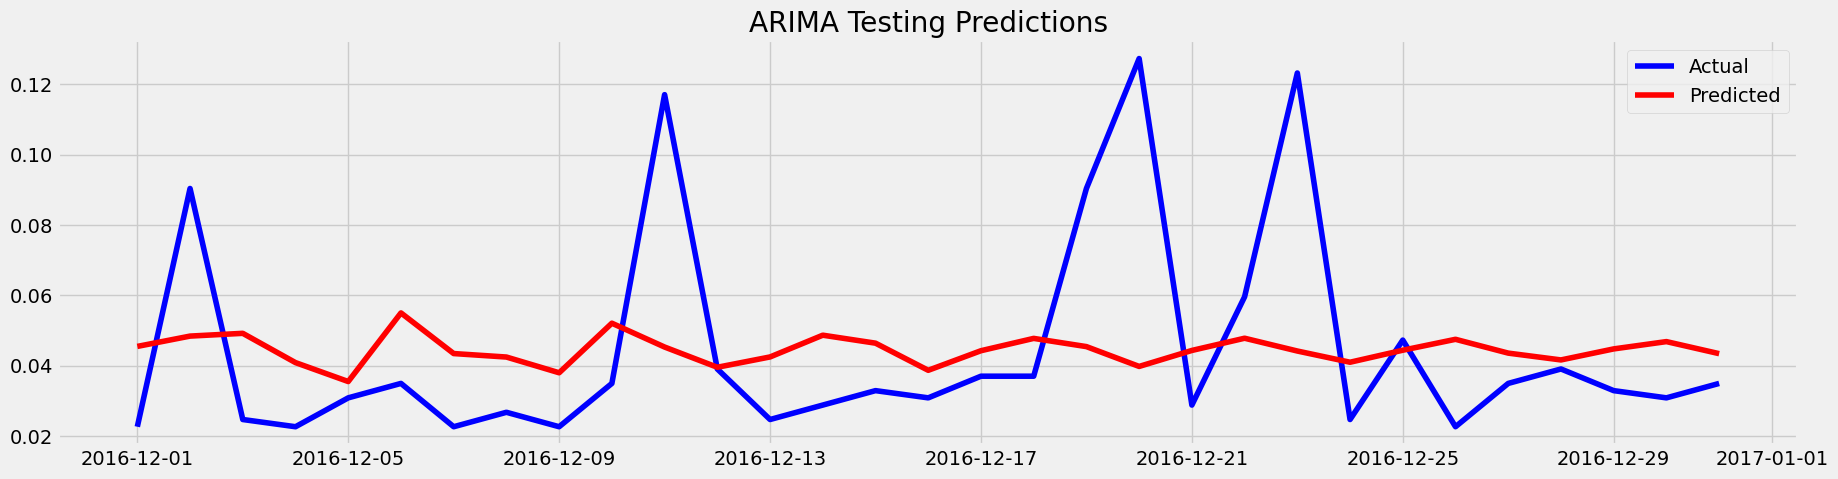

Train Error: 55.92916271725304 | Test Error: 44.579240809418195


In [50]:
row = data.iloc[0, :]
model = Arima(row, 5, 1, 5, 31, visualize_predictions=True)


#### Prophet

In [51]:
pip install prophet

09:54:32 - cmdstanpy - INFO - Chain [1] start processing
09:54:32 - cmdstanpy - INFO - Chain [1] done processing


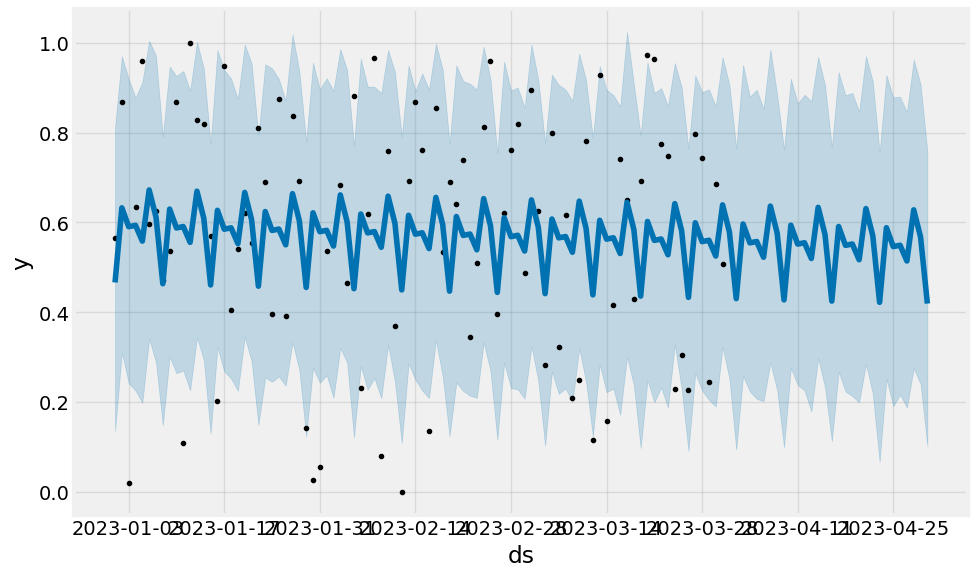

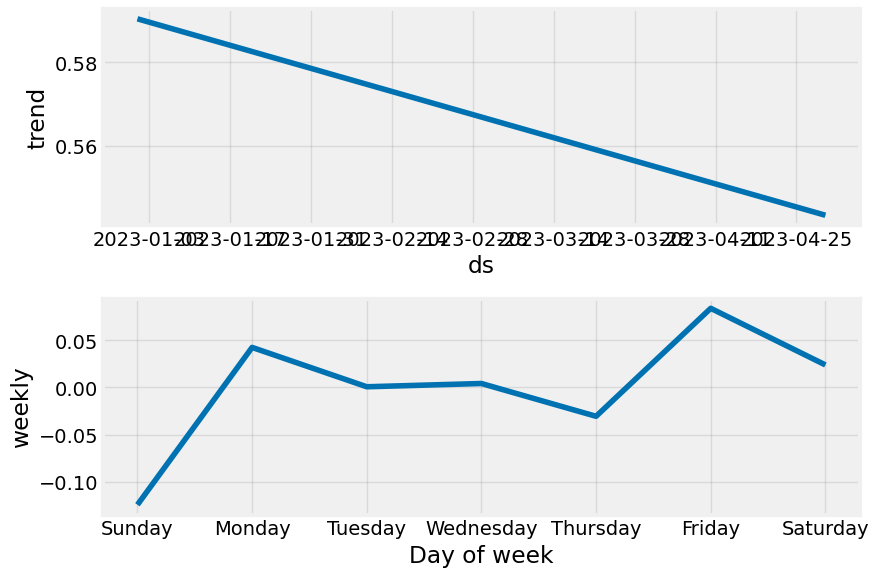

In [52]:
from prophet import Prophet
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

def prophet(data, test_days, visualize_predictions, plot_prophet_comp=False):
    # Assume data is already a DataFrame with a DatetimeIndex
    scaler = MinMaxScaler()
    data['y'] = scaler.fit_transform(data['y'].values.reshape(-1, 1))

    # Split the data for training
    train_data = data[:-test_days]
    test_data = data[-test_days:]

    # Prepare DataFrame for Prophet
    model = Prophet()
    model.fit(train_data)

    # Prepare for predictions
    future = model.make_future_dataframe(periods=test_days, freq='D')
    forecast = model.predict(future)

    # Visualizations and components plotting
    if visualize_predictions:
        model.plot(forecast)
        if plot_prophet_comp:
            model.plot_components(forecast)

    # Inverse scaling for error calculation might be added here
    # Ensure you handle this part as per your requirement

    return model

# Example usage
data = pd.DataFrame({
    'ds': pd.date_range(start='2023-01-01', periods=120, freq='D'),
    'y': np.random.rand(120)  # Random data as an example
})
model_prophet = prophet(data, 30, True, True)



#### LSTM

In [53]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [54]:
def plot_predictions(actual, predicted, title='Predictions', figsize=(20, 5)):
    plt.figure(figsize=figsize)
    plt.plot(actual, label='Actual Data')
    plt.plot(predicted, label='Predicted Data', alpha=0.7)
    plt.title(title)
    plt.xlabel('Time Step')
    plt.ylabel('Value')
    plt.legend()
    plt.show()

Epoch 1/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.3114
Epoch 2/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2735
Epoch 3/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1704
Epoch 4/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1135
Epoch 5/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1088
Epoch 6/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1045
Epoch 7/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0976
Epoch 8/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0993
Epoch 9/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0940
Epoch 10/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0936
Epoch 11/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0851
Epoch 12/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0904
Epoch 13/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0941
Epoch 14/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0789
Epoch 15/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0859
Epoch 16/50
66/66 ━

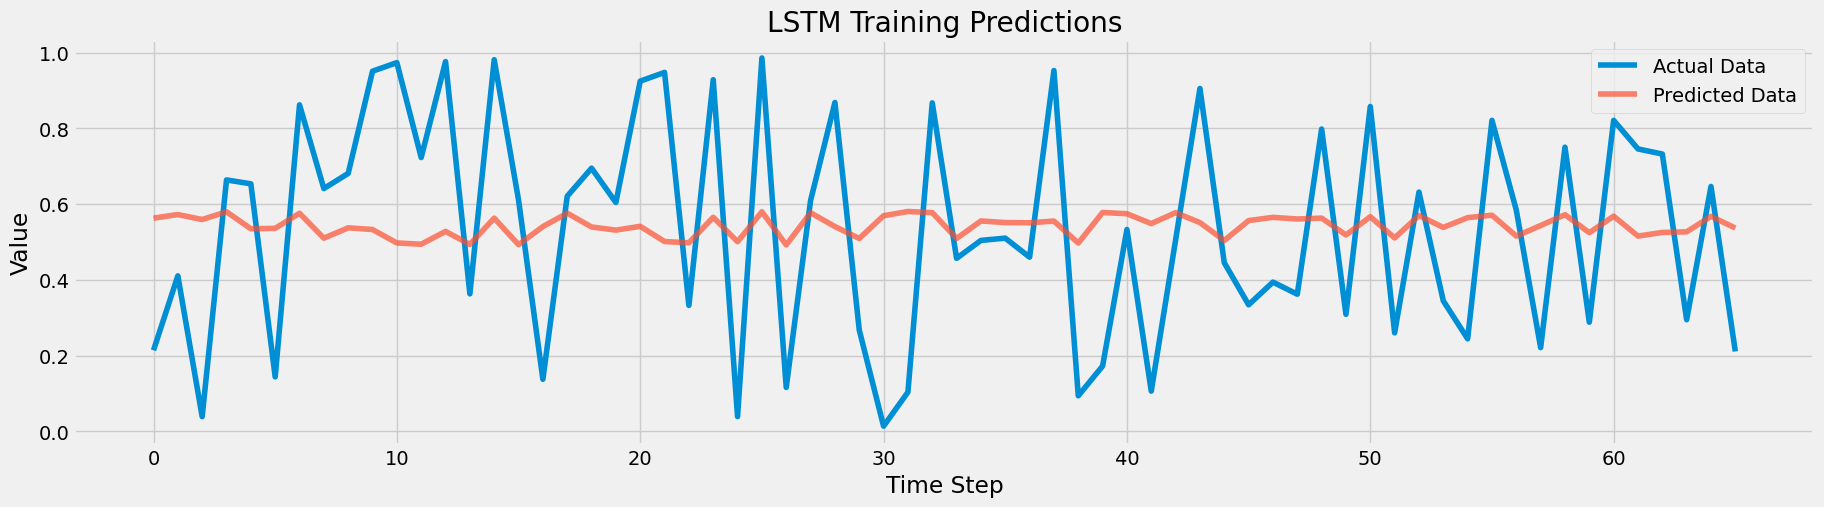

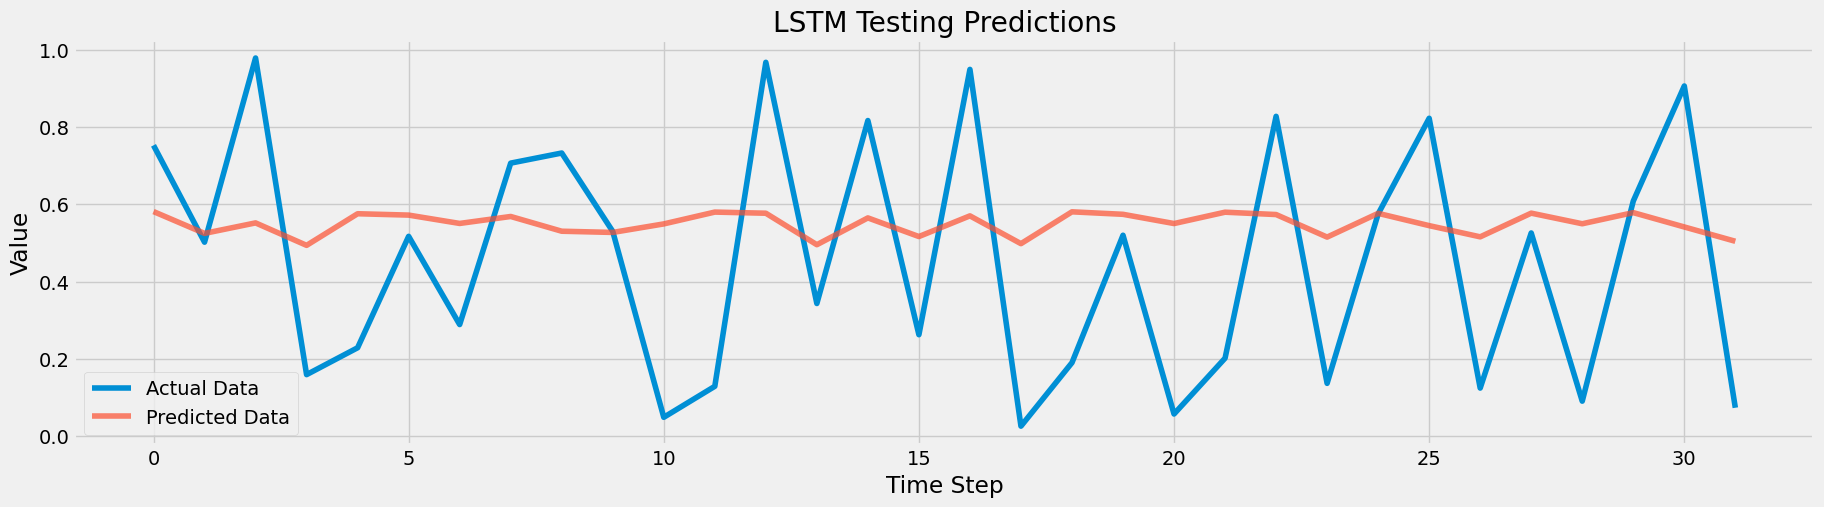

Train MSE: 0.08339074254753273
Test MSE: 0.10023201161119957


In [64]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back):
        a = dataset[i:(i + look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

def Lstm(x_train, y_train, input_shape, num_lstm, epochs):
    model = Sequential()
    model.add(LSTM(num_lstm, input_shape=input_shape))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    es = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5, restore_best_weights=True)
    model.fit(x_train, y_train, epochs=epochs, batch_size=1, verbose=1, callbacks=[es])
    return model

def run_lstm(data, num_lstm, epochs, visualize_predictions=False):
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(data.reshape(-1, 1))

    # Split into training and testing data
    train_size = int(len(scaled_data) * 0.67)
    train, test = scaled_data[:train_size, :], scaled_data[train_size:, :]

    # Create datasets for training and testing
    x_train, y_train = create_dataset(train)
    x_test, y_test = create_dataset(test)

    # Reshape input for LSTM
    x_train = np.reshape(x_train, (x_train.shape[0], 1, x_train.shape[1]))
    x_test = np.reshape(x_test, (x_test.shape[0], 1, x_test.shape[1]))

    # Build and train the LSTM model
    model = Lstm(x_train, y_train, (1, x_train.shape[2]), num_lstm, epochs)

    # Predictions
    train_pred = model.predict(x_train)
    test_pred = model.predict(x_test)

    # Inverse scaling for a forecast
    train_pred = scaler.inverse_transform(train_pred)
    test_pred = scaler.inverse_transform(test_pred)
    trainY_inverse = scaler.inverse_transform([y_train])
    testY_inverse = scaler.inverse_transform([y_test])

    # Calculate error
    train_error = mean_squared_error(trainY_inverse[0], train_pred[:, 0])
    test_error = mean_squared_error(testY_inverse[0], test_pred[:, 0])

    if visualize_predictions:
        plot_predictions(trainY_inverse[0], train_pred[:, 0], 'LSTM Training Predictions', (20, 5))
        plot_predictions(testY_inverse[0], test_pred[:, 0], 'LSTM Testing Predictions', (20, 5))

    print(f'Train MSE: {train_error}')
    print(f'Test MSE: {test_error}')

    return model


# Prepare data
data = np.random.rand(100)  
model_lstm = run_lstm(data, 10, 50, True)


Epoch 1/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.3300
Epoch 2/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1752
Epoch 3/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1523
Epoch 4/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1023
Epoch 5/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1209
Epoch 6/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1214
Epoch 7/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0983
Epoch 8/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1126
Epoch 9/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0989
Epoch 10/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0975
Epoch 11/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0973    
Epoch 12/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0842
Epoch 13/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0935
Epoch 14/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0902
Epoch 15/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0996 
Epoch 16/50
66

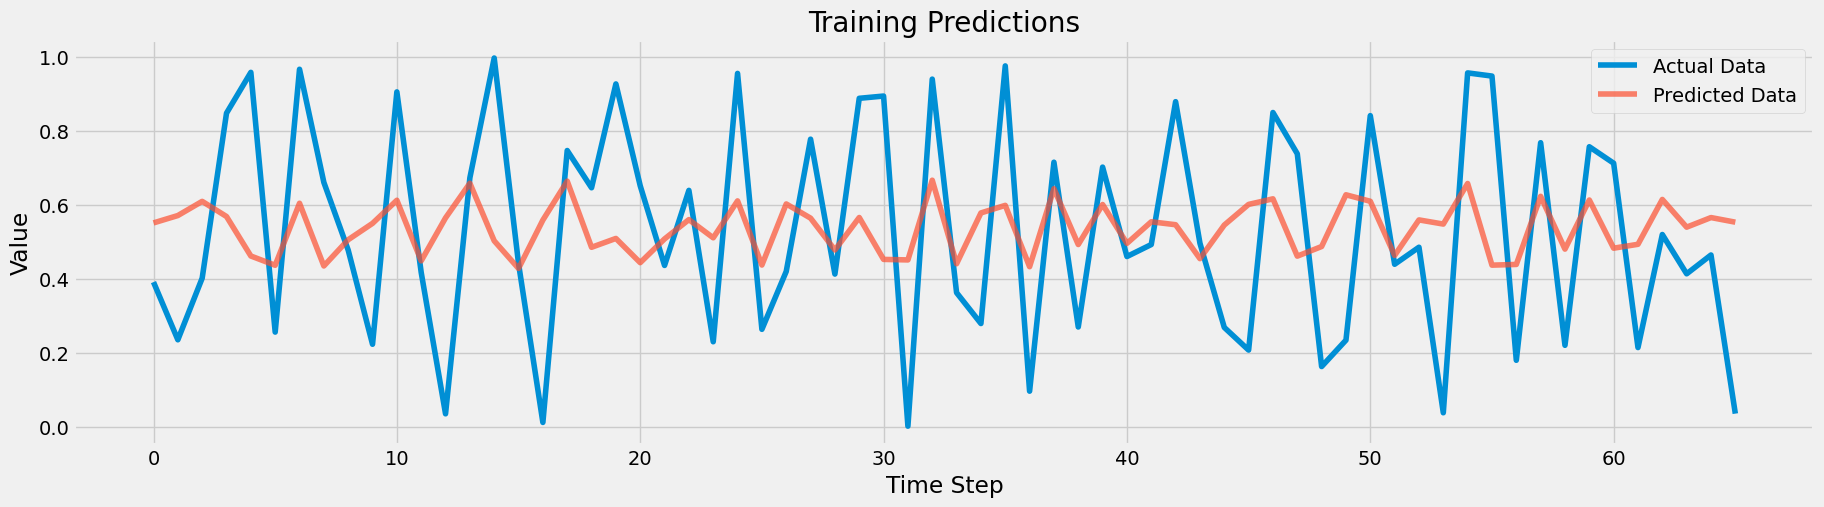

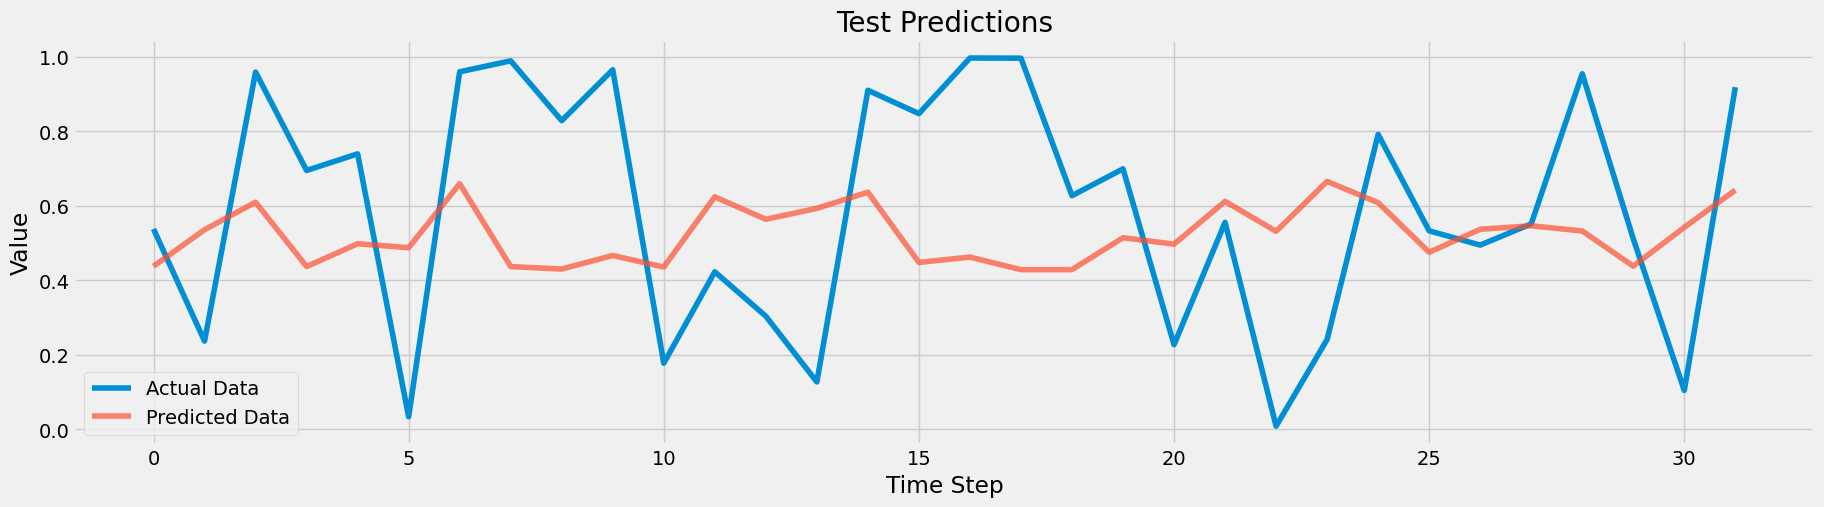

Train MSE: 0.08075900247974453
Test MSE: 0.11510028082687912
Train RMSE: 0.2841812845346163
Test RMSE: 0.33926432295023173


In [72]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back):
        a = dataset[i:(i + look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

def Lstm(x_train, y_train, input_shape, num_lstm, epochs):
    model = Sequential()
    model.add(LSTM(num_lstm, input_shape=input_shape))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    es = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5, restore_best_weights=True)
    model.fit(x_train, y_train, epochs=epochs, batch_size=1, verbose=1, callbacks=[es])
    return model

def run_lstm(data, num_lstm, epochs, visualize_predictions=False):
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(data.reshape(-1, 1))

    # Split into training and testing data
    train_size = int(len(scaled_data) * 0.67)
    train, test = scaled_data[:train_size, :], scaled_data[train_size:, :]

    # Create datasets for training and testing
    x_train, y_train = create_dataset(train)
    x_test, y_test = create_dataset(test)

    # Reshape input for LSTM
    x_train = np.reshape(x_train, (x_train.shape[0], 1, x_train.shape[1]))
    x_test = np.reshape(x_test, (x_test.shape[0], 1, x_test.shape[1]))

    # Build and train the LSTM model
    model = Lstm(x_train, y_train, (1, x_train.shape[2]), num_lstm, epochs)

    # Predictions
    train_pred = model.predict(x_train)
    test_pred = model.predict(x_test)

    # Inverse scaling for a forecast
    train_pred = scaler.inverse_transform(train_pred)
    test_pred = scaler.inverse_transform(test_pred)
    trainY_inverse = scaler.inverse_transform([y_train])
    testY_inverse = scaler.inverse_transform([y_test])

    # Calculate error
    train_error = mean_squared_error(trainY_inverse[0], train_pred[:, 0])
    test_error = mean_squared_error(testY_inverse[0], test_pred[:, 0])

    if visualize_predictions:
 
        plot_predictions(trainY_inverse[0], train_pred[:, 0], title='Training Predictions', figsize=(20, 5))
        plot_predictions(testY_inverse[0], test_pred[:, 0], title='Test Predictions', figsize=(20, 5))

    print(f'Train MSE: {train_error}')
    print(f'Test MSE: {test_error}')

    return model, train_error, test_error

# Prepare data
data = np.random.rand(100)  # Example data, replace with actual data
model_lstm, train_error, test_error = run_lstm(data, 10, 50, True)

# Calculate RMSE
train_rmse = np.sqrt(train_error)
test_rmse = np.sqrt(test_error)

print(f'Train RMSE: {train_rmse}')
print(f'Test RMSE: {test_rmse}')


In [67]:
import numpy as np

# Calculate RMSE
train_rmse = np.sqrt(train_error)
test_rmse = np.sqrt(test_error)

print(f'Train RMSE: {train_rmse}')
print(f'Test RMSE: {test_rmse}')


Train RMSE: 0.2528409160381032
Test RMSE: 0.3149430588124232


#### XG BOOST

In [57]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


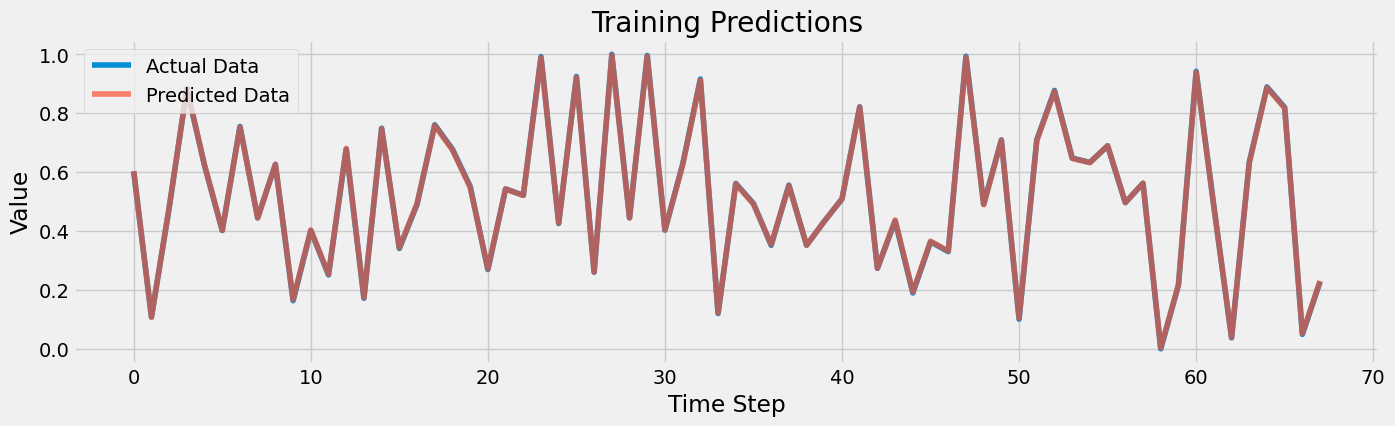

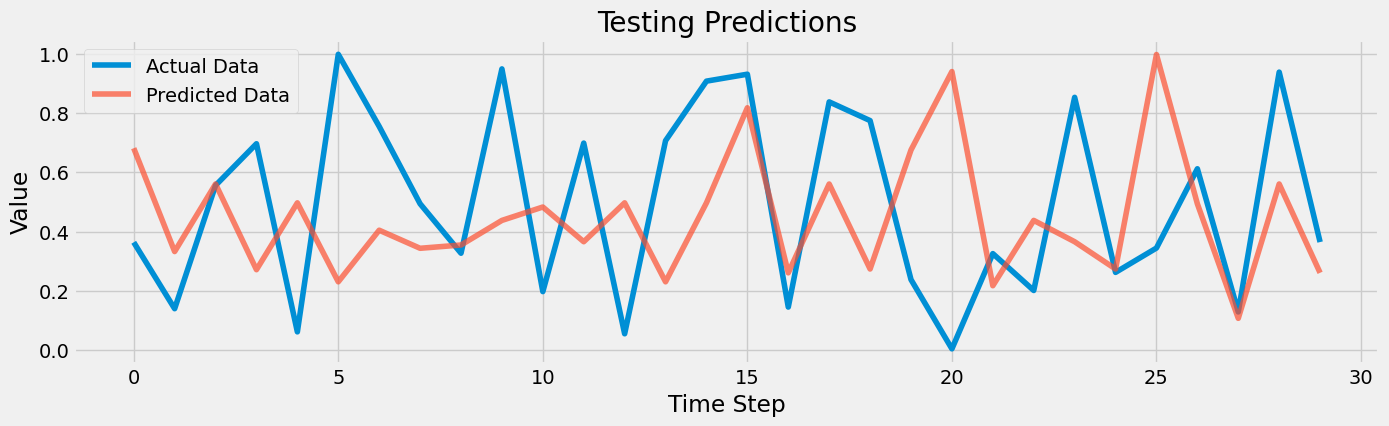

Train Error: 3.551419748145794 | Test Error: 69.14080187708197


In [58]:
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back):
        a = dataset[i:(i + look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

def smape(actual, predicted):
    denominator = (np.abs(actual) + np.abs(predicted)) / 2.0
    diff = np.abs(predicted - actual) / denominator
    diff[denominator == 0] = 0.0  # ignore zero terms in the denominator
    return 100 * np.mean(diff)

def plot_predictions(actual, predicted, title='Predictions', figsize=(20, 5)):
    plt.figure(figsize=figsize)
    plt.plot(actual, label='Actual Data')
    plt.plot(predicted, label='Predicted Data', alpha=0.7)
    plt.title(title)
    plt.xlabel('Time Step')
    plt.ylabel('Value')
    plt.legend()
    plt.show()

def xgboost(data, estimators, visualize_predictions):
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(data.reshape(-1, 1))
    
    # Split into training and testing
    train = scaled_data[:-31]
    test = scaled_data[-31:]
    
    x_train, y_train = create_dataset(train)
    x_test, y_test = create_dataset(test)
    
    model = XGBRegressor(objective='reg:squarederror', n_estimators=estimators)
    model.fit(x_train, y_train)
    
    train_pred = model.predict(x_train)
    test_pred = model.predict(x_test)
    
    train_error = smape(y_train, train_pred)
    test_error = smape(y_test, test_pred)
    
    if visualize_predictions:
        plot_predictions(y_train, train_pred, title='Training Predictions', figsize=(15, 4))
        plot_predictions(y_test, test_pred, title='Testing Predictions', figsize=(15, 4))
    
    print(f'Train Error: {train_error} | Test Error: {test_error}')
    
    return model

# Example usage
data = np.random.rand(100)  # Example data, replace with your actual data
model_xgb = xgboost(data, 2000, True)


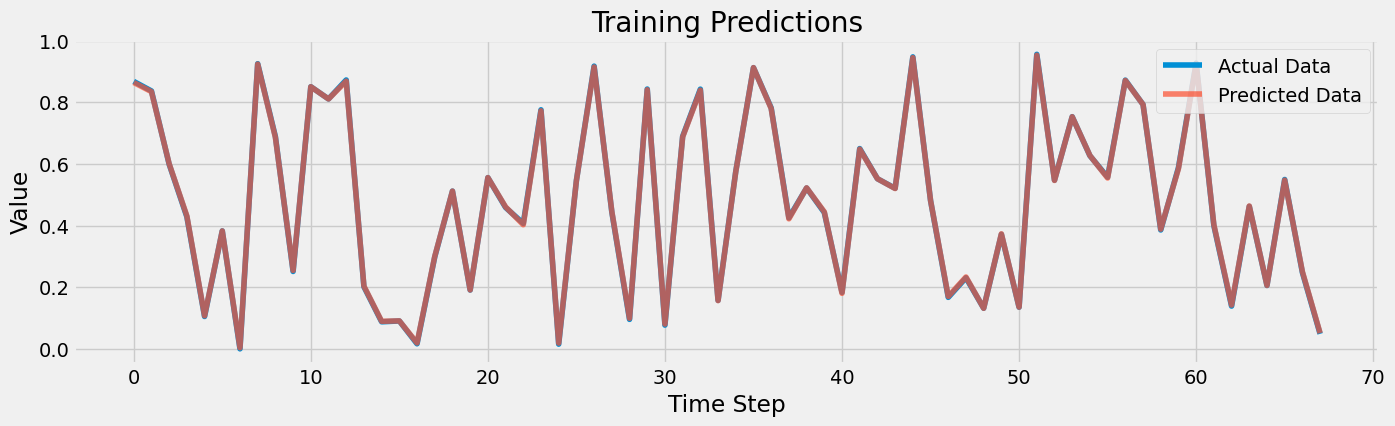

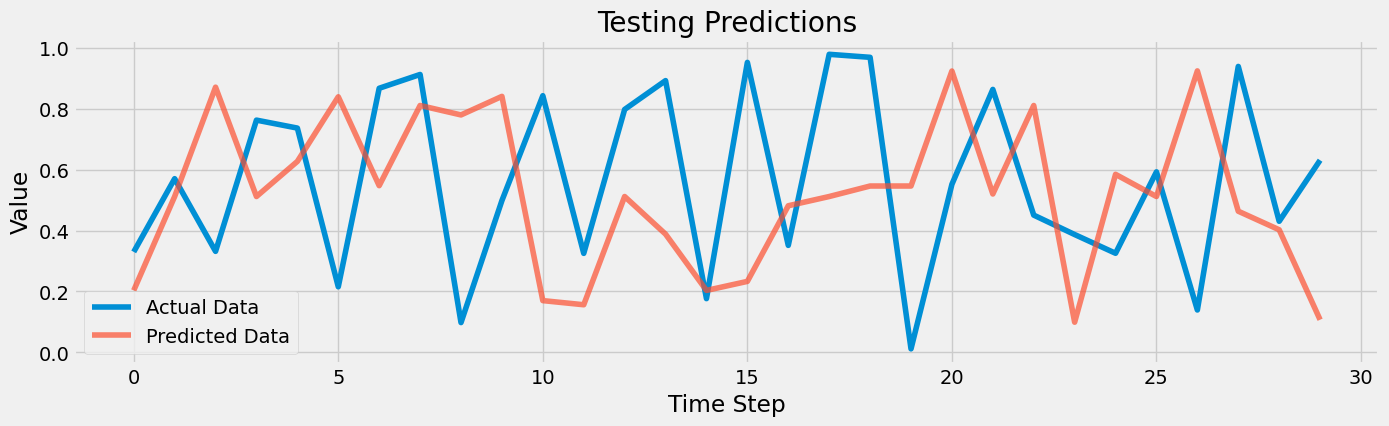

Train Error: 3.9200179515118867 | Test Error: 69.93797494997523


In [62]:
import pandas as pd

def xgboost(data, estimators, visualize_predictions):
    # Convert numpy array to DataFrame if it's not already one
    if isinstance(data, np.ndarray):
        data = pd.DataFrame(data, columns=['value'])  # Ensure column name matches your context

    # Split into training and testing
    train = data.iloc[:-31]
    test = data.iloc[-31:]

    x_train, y_train = create_dataset(train['value'].values.reshape(-1, 1))
    x_test, y_test = create_dataset(test['value'].values.reshape(-1, 1))

    model = XGBRegressor(objective='reg:squarederror', n_estimators=estimators)
    model.fit(x_train, y_train)
    
    train_pred = model.predict(x_train)
    test_pred = model.predict(x_test)
    
    train_error = smape(y_train, train_pred)
    test_error = smape(y_test, test_pred)
    
    if visualize_predictions:
        plot_predictions(y_train, train_pred, figsize=(15, 4), title='Training Predictions')
        plot_predictions(y_test, test_pred, figsize=(15, 4), title='Testing Predictions')
    
    print(f'Train Error: {train_error} | Test Error: {test_error}')
    
    return model

# Example usage assuming data is a 2D numpy array
data = np.random.rand(100, 1)  # Example 2D data with one column
data_df = pd.DataFrame(data, columns=['value'])
model_xgb = xgboost(data_df, 2000, True)
